## Assignment 1

1. Summary of the loan dataset (5%)
2. Exploratory data analysis (15%)
3. Data pre-processing (25%)
4. Model training (KNN) (5%)
5. Model training (Naïve Bayes) (5%)
6. Model training (Decision Tree) (5%)
7. Model training (SVM) (5%)
8. Model evaluation (15%)
9. Making prediction (5%)

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import svm
from sklearn import svm as svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
dataset = pd.read_csv(r"D:\Users\user\AppData\Desktop\HKBU Master\02 - Semester 2 (2022)\Machine learning\02 - Group Project\LC_Loan_Dataset_100K.csv",index_col=0, low_memory=False)

In [5]:
dataset.shape # show the number of rows & columns

(100000, 150)

In [6]:
dataset.head() # show the first few rows of the dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
#Recall the definition of columns 'id'
#A unique ID for the loan
#drop column for data's id number(unique data id with no meaning)
dataset.drop('id',
          axis = 'columns',
          inplace = True)

In [8]:
dataset.dtypes  # show column data types

member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
desc                                           object
purpose                     

In [9]:
#visualise the independent variable
dataset['loan_status'].head()

0     Fully Paid
1    Charged Off
2     Fully Paid
3        Current
4    Charged Off
Name: loan_status, dtype: object

In [10]:
dataset['loan_status'].dtypes

dtype('O')

In [11]:
#list out all unique value in loan_status
dataset['loan_status'].value_counts()

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

<AxesSubplot:>

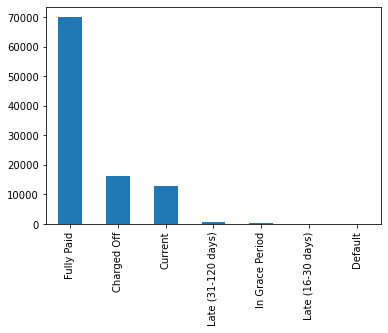

In [12]:
dataset['loan_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

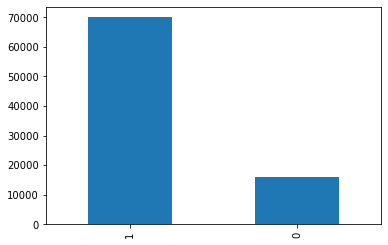

In [13]:
#Given that our topic is to study the 'loan_status' column with values 'Charged Off' or 'Fully Paid'
#drop rows in 'loan_status' where the value is not 'Charged Off' or 'Fully Paid'
dataset = dataset[(dataset['loan_status'] == 'Fully Paid') | (dataset['loan_status'] == 'Charged Off')]
#For 'loan_status', replace 'Fully Paid' by 1,'Charged Off' by 0
dataset['loan_status'] = ['1' if item == 'Fully Paid' else item for item in dataset['loan_status']]
dataset['loan_status'] = ['0' if item == 'Charged Off' else item for item in dataset['loan_status']]
dataset['loan_status'] = dataset['loan_status'].astype(int)
dataset['loan_status'].value_counts().plot(kind='bar')

In [14]:
#Check % of missing for each column
(dataset.isnull().sum() / len(dataset) * 100).sort_values(ascending=False)

member_id                                     100.000000
inq_fi                                        100.000000
dti_joint                                     100.000000
verification_status_joint                     100.000000
open_acc_6m                                   100.000000
open_act_il                                   100.000000
open_il_12m                                   100.000000
open_il_24m                                   100.000000
mths_since_rcnt_il                            100.000000
total_bal_il                                  100.000000
il_util                                       100.000000
open_rv_12m                                   100.000000
open_rv_24m                                   100.000000
max_bal_bc                                    100.000000
all_util                                      100.000000
inq_last_12m                                  100.000000
next_pymnt_d                                  100.000000
revol_bal_joint                

In [15]:
#drop column with % of missing data>10%,as the above result shows that % of missing data will increase to over 48% after the threshold 10% 
dataset.dropna(thresh=len(dataset)*0.95,
               axis = 'columns',
               inplace = True)

In [16]:
#Check % of missing for each column after drop of column
(dataset.isnull().sum() / len(dataset) * 100).sort_values(ascending=False)

mo_sin_old_il_acct            3.156563
num_tl_120dpd_2m              2.114050
bc_util                       1.217813
percent_bc_gt_75              1.185307
bc_open_to_buy                1.156284
mths_since_recent_bc          1.068054
last_pymnt_d                  0.077782
revol_util                    0.051081
last_credit_pull_d            0.017414
mort_acc                      0.000000
mo_sin_rcnt_tl                0.000000
mo_sin_rcnt_rev_tl_op         0.000000
mo_sin_old_rev_tl_op          0.000000
loan_amnt                     0.000000
delinq_amnt                   0.000000
chargeoff_within_12_mths      0.000000
num_actv_bc_tl                0.000000
avg_cur_bal                   0.000000
acc_open_past_24mths          0.000000
total_rev_hi_lim              0.000000
tot_cur_bal                   0.000000
tot_coll_amt                  0.000000
num_accts_ever_120_pd         0.000000
num_bc_sats                   0.000000
num_actv_rev_tl               0.000000
pct_tl_nvr_dlq           

In [17]:
dataset.shape # show the number of rows & columns before drop of rows

(86138, 88)

In [18]:
#drop row with missing value data
dataset.dropna(inplace = True)
#We try different threshold and get the result of "dataset.shape", we finally choose 5% as the threshold
#(69274, 91) if the threshold is 10%,69274/86138=80.42% near 20% data are drop
#(76326, 90) if the threshold is 6%,76326/86138=88.61% over 10% data are drop
#(80563, 88) if the threshold is 5%,80563/86138=93.53% only 6.47% data are drop which is a more reasonable level


In [19]:
#drop column with only one unique value as the data unchange among different class of dependent variable 'loan_status' which cannot help modeling
for i in dataset.columns:
    if len(dataset[i].unique()) == 1:
       dataset.drop(i, axis=1, inplace=True)

In [20]:
dataset.dtypes #check the remaining data after dropping missing data

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                     int32
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [21]:
#visualise the object data
for i in dataset.columns:
    if dataset[i].dtypes == object:
       print(i)
       print(dataset[i].dtypes)
       print(len(dataset[i].unique()))
       print(dataset[i].unique())

term
object
2
[' 60 months' ' 36 months']
grade
object
7
['C' 'A' 'D' 'B' 'E' 'F' 'G']
sub_grade
object
35
['C1' 'A3' 'D1' 'C3' 'B5' 'B4' 'C4' 'D5' 'B3' 'C5' 'D2' 'C2' 'B2' 'A4'
 'D3' 'B1' 'A5' 'E5' 'F1' 'E4' 'D4' 'E2' 'E1' 'G2' 'G1' 'F3' 'F2' 'A1'
 'A2' 'G3' 'E3' 'F4' 'G4' 'F5' 'G5']
home_ownership
object
4
['RENT' 'MORTGAGE' 'OWN' 'ANY']
verification_status
object
3
['Source Verified' 'Not Verified' 'Verified']
issue_d
object
5
['Dec-2014' 'Nov-2014' 'Oct-2014' 'Sep-2014' 'Aug-2014']
purpose
object
13
['debt_consolidation' 'credit_card' 'home_improvement' 'house' 'medical'
 'other' 'car' 'major_purchase' 'moving' 'small_business' 'vacation'
 'renewable_energy' 'wedding']
title
object
20
['Debt consolidation' 'Credit card refinancing' 'Home improvement'
 'Home buying' 'Medical expenses' 'Other' 'Car financing' 'Major purchase'
 'Moving and relocation' 'Business' 'Vacation' 'Green loan' 'debt payoff'
 'Consolidation' 'debt pay off' 'Engagement Ring Purchase' 'Finish line'
 'Debt Clean 

In [22]:
#Consider the 4 column with date data
#As the purpose is to do default prediction
#recall the column description of 'last_pymnt_d' & 'last_credit_pull_d' as below
#last_pymnt_d:The month the last payment was received.
#last_credit_pull_d:The most recent month the lender pulled credit for this loan.
#Drop these 2 column because these two column can only collect after the loan lend out which cannot be used for credit approval
dataset.drop('last_pymnt_d',
             axis = 'columns',
             inplace = True)
dataset.drop('last_credit_pull_d',
             axis = 'columns',
             inplace = True)

In [23]:
#Convert the below 2 column to a datetime object
dataset['issue_d'] = dataset['issue_d'].astype('datetime64[ns]')
dataset['earliest_cr_line'] = dataset['earliest_cr_line'].astype('datetime64[ns]')
#recall the column description as below
#issue_d:The month in which the loan was funded.
#earliest_cr_line:The month the borrower's earliest reported credit line was opened.
#creat a new column 'length of credit history' when the loan is issued (measure in days)
#'issue_d' , 'earliest_cr_line' doesn't have meaning for credit approval but length of client's credit history may reflect the credibility
length_of_credit_history = []
for i in range(0,len(dataset)):
    length_of_credit_history.append((dataset.iloc[i]['issue_d']-dataset.iloc[i]['earliest_cr_line']).days)
dataset['length_of_credit_history'] = length_of_credit_history
#Drop 'issue_d' , 'earliest_cr_line' column 
dataset.drop('issue_d',
             axis = 'columns',
             inplace = True)
dataset.drop('earliest_cr_line',
             axis = 'columns',
             inplace = True)

In [24]:
#For 'term' column, replace ' 60 months' by 60,' 36 months' by 36
dataset['term'] = ['60' if item == ' 60 months' else item for item in dataset['term']]
dataset['term'] = ['36' if item == ' 36 months' else item for item in dataset['term']]
dataset['term'] = dataset['term'].astype(int)

In [25]:
#For 'verification_status' column, replace 'Not Verified' by 0,'Verified' by 1,'Source Verified' by 1
dataset['verification_status'] = ['0' if item == 'Not Verified' else item for item in dataset['verification_status']]
dataset['verification_status'] = ['1' if item == 'Verified' else item for item in dataset['verification_status']]
dataset['verification_status'] = ['1' if item == 'Source Verified' else item for item in dataset['verification_status']]
dataset['verification_status'] = dataset['verification_status'].astype(int)

In [26]:
#For 'initial_list_status' column, replace 'w' by 1,'f' by 0
dataset['initial_list_status'] = ['1' if item == 'w' else item for item in dataset['initial_list_status']]
dataset['initial_list_status'] = ['0' if item == 'f' else item for item in dataset['initial_list_status']]
dataset['initial_list_status'] = dataset['initial_list_status'].astype(int)

In [27]:
#For 'debt_settlement_flag' column, replace 'Y' by 1,'N' by 0
dataset['debt_settlement_flag'] = ['1' if item == 'Y' else item for item in dataset['debt_settlement_flag']]
dataset['debt_settlement_flag'] = ['0' if item == 'N' else item for item in dataset['debt_settlement_flag']]
dataset['debt_settlement_flag'] = dataset['debt_settlement_flag'].astype(int)

In [28]:
#For grade data
#recall the column description as below
#Grade:Grade assigned to the loan.
#sub_grade: Subgrade assigned to the loan.
#visualise the grade data
dataset['grade'].head(100)

0      C
1      A
2      D
4      C
5      C
6      B
7      B
8      C
9      B
10     B
11     D
12     C
14     B
15     C
16     B
17     D
18     C
22     C
23     C
25     C
26     B
28     B
29     D
32     A
33     D
36     B
37     C
38     B
41     C
42     D
46     A
47     B
49     B
50     C
52     A
53     D
54     C
55     B
57     B
58     D
59     B
61     C
63     C
64     C
65     C
66     E
68     B
69     A
71     F
72     A
73     C
74     B
76     B
77     D
78     B
80     B
82     C
83     B
84     D
85     B
86     A
87     C
88     B
89     E
90     D
92     E
93     D
94     C
95     D
96     C
97     C
102    A
103    D
106    C
107    C
108    C
109    C
110    E
111    C
113    C
114    D
115    G
116    E
117    D
118    C
120    D
123    C
124    B
126    B
127    B
131    A
134    B
135    B
136    C
138    G
139    F
141    D
142    C
144    C
145    D
Name: grade, dtype: object

In [29]:
dataset['sub_grade'].head(100)

0      C1
1      A3
2      D1
4      C3
5      C3
6      B5
7      B4
8      C4
9      B4
10     B5
11     D5
12     C3
14     B3
15     C5
16     B3
17     D2
18     C4
22     C1
23     C5
25     C2
26     B2
28     B3
29     D2
32     A4
33     D3
36     B1
37     C1
38     B2
41     C1
42     D2
46     A5
47     B3
49     B2
50     C2
52     A3
53     D3
54     C4
55     B4
57     B4
58     D5
59     B5
61     C5
63     C5
64     C5
65     C5
66     E5
68     B5
69     A5
71     F1
72     A5
73     C2
74     B3
76     B3
77     D2
78     B2
80     B2
82     C3
83     B4
84     D5
85     B2
86     A5
87     C5
88     B3
89     E4
90     D4
92     E2
93     D2
94     C1
95     D4
96     C3
97     C4
102    A5
103    D2
106    C2
107    C5
108    C3
109    C4
110    E1
111    C1
113    C3
114    D1
115    G2
116    E1
117    D2
118    C1
120    D3
123    C5
124    B3
126    B5
127    B4
131    A3
134    B5
135    B2
136    C1
138    G1
139    F3
141    D1
142    C2
144    C1
145    D1


In [30]:
#Drop 'grade' column as sub_grade is a more specific column for the load's grading
dataset.drop('grade',
             axis = 'columns',
             inplace = True)

In [31]:
#transform the below object data to int32 data with a list for data mapping
#'sub_grade' map with list_sub_grade
#'home_ownership' map with list_home_ownership
#'purpose' map with list_purpose
#'title' map with list_title
#'zip_code' map with list_zip_code
#'addr_state' map with list_addr_state

list_sub_grade = list(dataset['sub_grade'].unique())
list_sub_grade.sort()
ent = {k: i for i, k in enumerate(list_sub_grade)} 
dataset['sub_grade'] = list(map(ent.get, dataset['sub_grade']))

list_home_ownership = list(dataset['home_ownership'].unique())
list_home_ownership.sort()
ent = {k: i for i, k in enumerate(list_home_ownership)} 
dataset['home_ownership'] = list(map(ent.get, dataset['home_ownership']))

list_purpose = list(dataset['purpose'].unique())
list_purpose.sort()
ent = {k: i for i, k in enumerate(list_purpose)} 
dataset['purpose'] = list(map(ent.get, dataset['purpose']))

list_title = list(dataset['title'].unique())
list_title.sort()
ent = {k: i for i, k in enumerate(list_title)} 
dataset['title'] = list(map(ent.get, dataset['title']))

list_zip_code = list(dataset['zip_code'].unique())
list_zip_code.sort()
ent = {k: i for i, k in enumerate(list_zip_code)} 
dataset['zip_code'] = list(map(ent.get, dataset['zip_code']))

list_addr_state = list(dataset['addr_state'].unique())
list_addr_state.sort()
ent = {k: i for i, k in enumerate(list_addr_state)} 
dataset['addr_state'] = list(map(ent.get, dataset['addr_state']))

In [32]:
#double check the data type after pervious process
dataset.dtypes


loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
sub_grade                       int64
home_ownership                  int64
annual_inc                    float64
verification_status             int32
loan_status                     int32
purpose                         int64
title                           int64
zip_code                        int64
addr_state                      int64
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
total_pymnt 

In [33]:
dataset.shape

(80563, 77)

In [34]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,length_of_credit_history
0,15000.0,15000.0,15000.0,60,12.39,336.64,10,3,78000.0,1,1,2,5,202,40,12.03,0.0,750.0,754.0,0.0,6.0,0.0,138008.0,29.0,17.0,1,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,12017.81,684.0,680.0,0.0,0.0,0.0,149140.0,184500.0,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,0,7427
1,10400.0,10400.0,10400.0,36,6.99,321.08,2,1,58000.0,0,0,1,3,786,4,14.92,0.0,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,1,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,321.08,564.0,560.0,0.0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,0,9222
2,21425.0,21425.0,21425.0,60,15.59,516.36,15,3,63800.0,1,1,1,3,565,21,18.49,0.0,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,1,25512.20,25512.20,21425.00,4087.20,0.0,0.00,0.0000,17813.19,704.0,700.0,0.0,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,0,4140
4,7650.0,7650.0,7650.0,36,13.66,260.20,12,3,50000.0,1,0,2,5,718,3,34.81,0.0,685.0,689.0,1.0,11.0,0.0,16822.0,91.9,20.0,0,2281.98,2281.98,704.38,339.61,0.0,1237.99,222.8382,17.70,559.0,555.0,0.0,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,137.0,148.0,8.0,8.0,0.0,17.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,0,4505
5,9600.0,9600.0,9600.0,36,13.66,326.53,12,3,69000.0,1,1,2,5,57,26,25.81,0.0,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,0,9973.43,9973.43,9600.00,373.43,0.0,0.00,0.0000,9338.58,724.0,720.0,0.0,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,183.0,265.0,23.0,3.0,0.0,24.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,0,8065


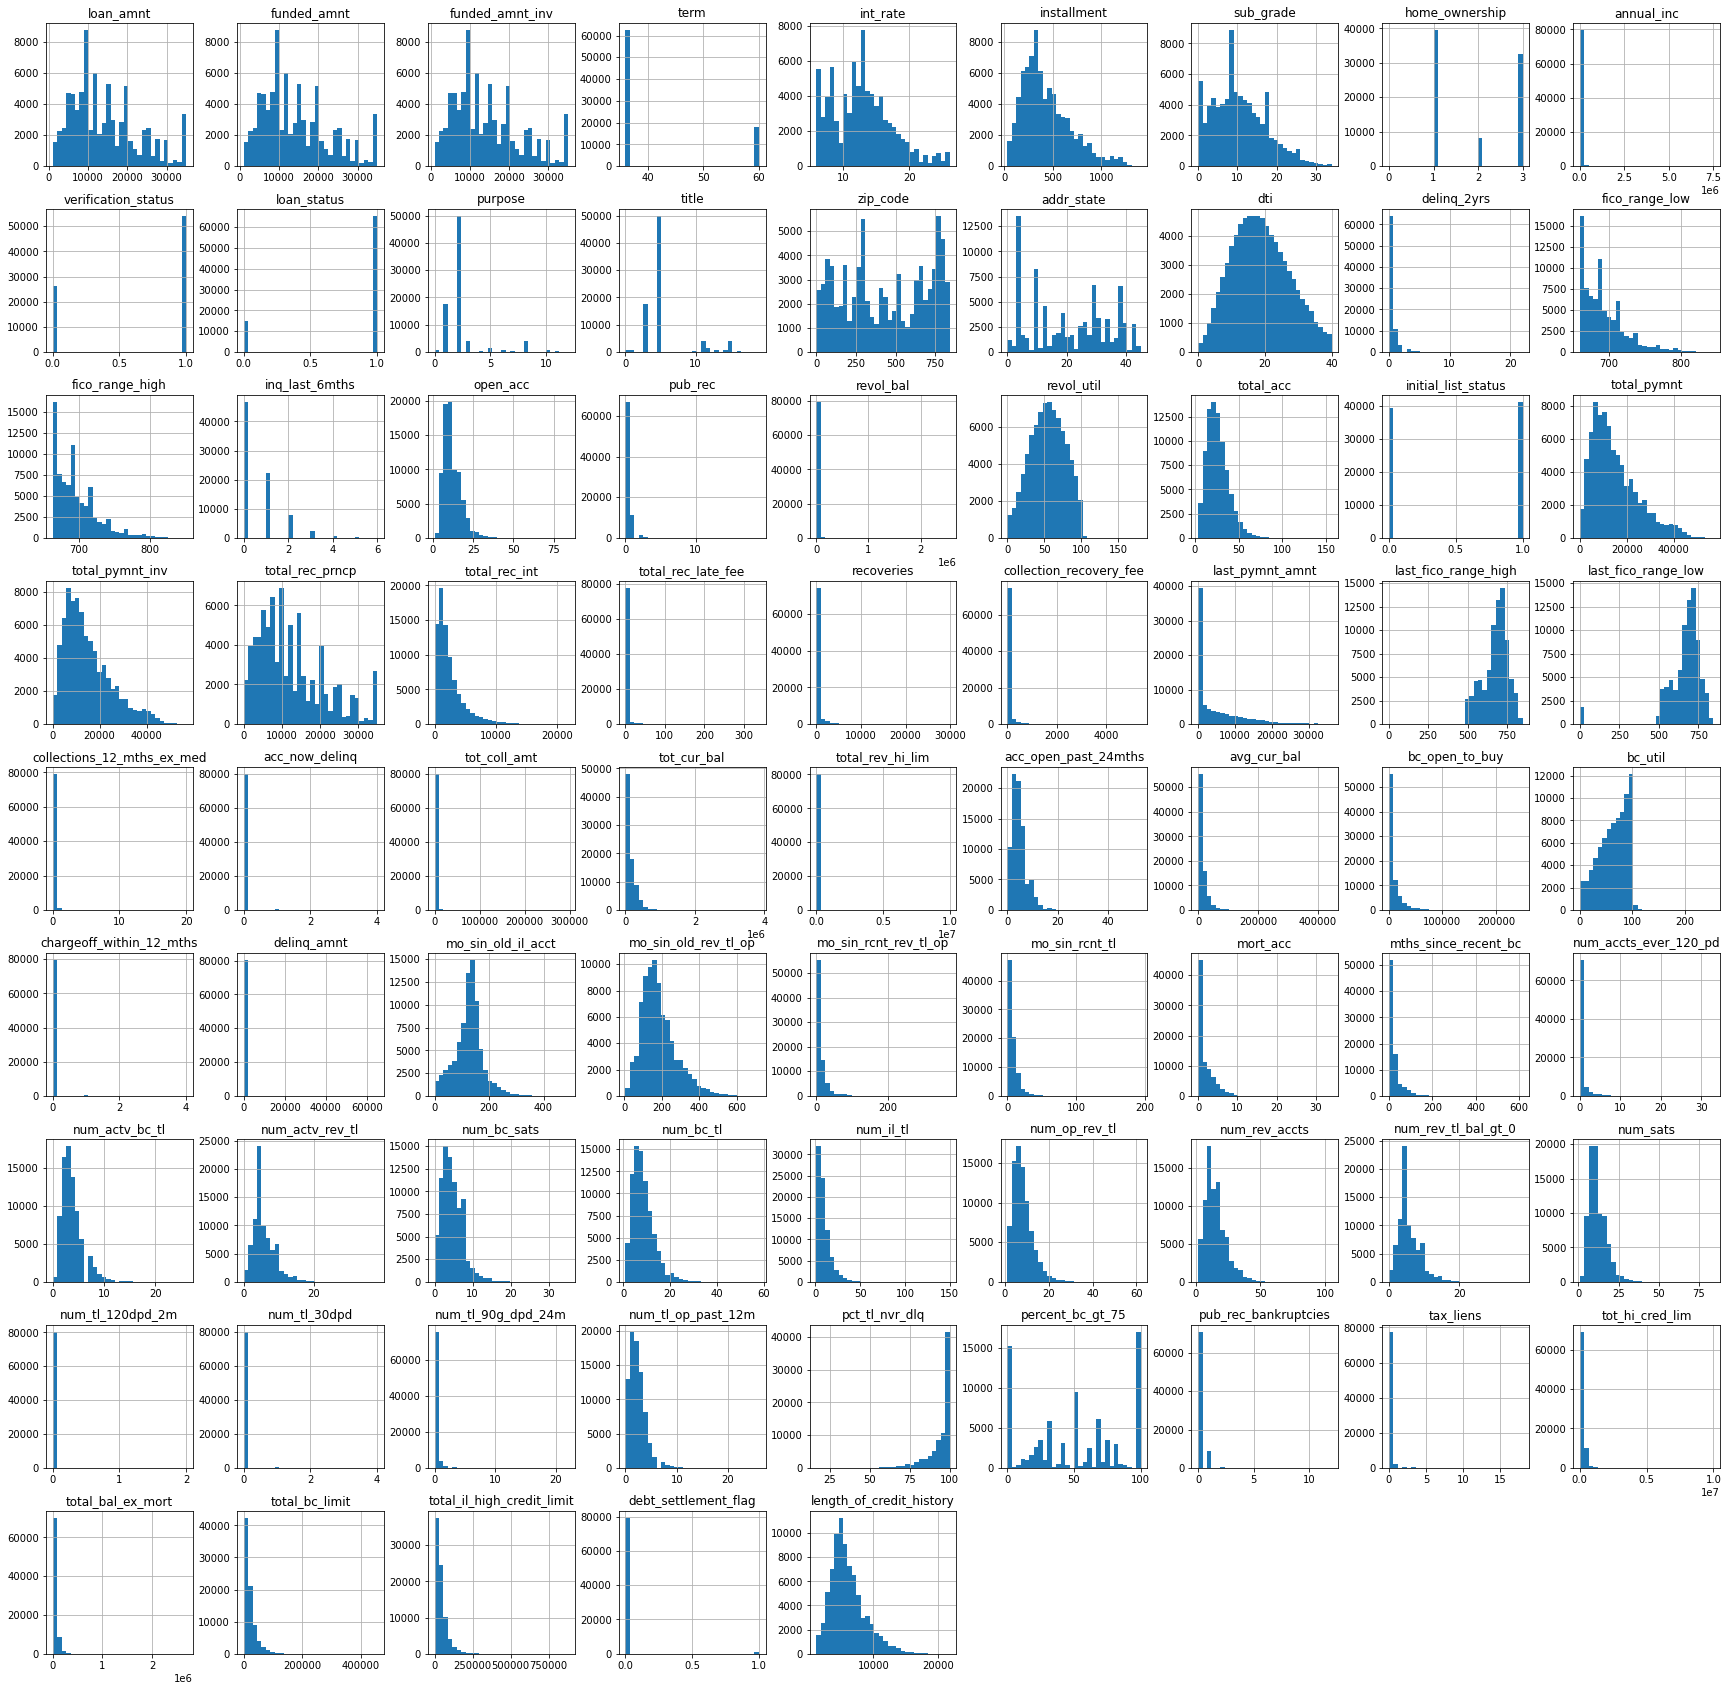

In [35]:
dataset.hist(bins=30, figsize=(30,30))
plt.show()

In [36]:
dataset.corr(method='pearson')

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,length_of_credit_history
loan_amnt,1.000000,1.000000,0.999997,0.364919,0.088035,0.955780,0.091443,-0.201302,0.366192,0.365585,-0.062213,-0.156130,-0.165354,0.002612,0.012848,-0.007608,-0.016623,0.141870,0.141869,-0.027384,0.178208,-0.098608,0.323952,0.110495,0.204194,0.108880,0.882765,0.882752,0.813478,0.709562,0.070217,0.188975,0.185122,0.481081,0.074429,0.061014,-0.017271,-0.006573,-0.018464,0.337481,0.257634,-0.008383,0.251523,0.225587,0.034302,-0.002751,0.002602,0.143183,0.182893,0.055930,0.041441,0.241788,0.032176,-0.065681,0.205378,0.152556,0.235040,0.202069,0.061101,0.172042,0.175619,0.152962,0.179516,-0.001458,-0.002729,-0.023521,-0.040142,0.104676,-0.001750,-0.127531,-0.000997,0.352067,0.280416,0.409635,0.183162,0.015922,0.173582
funded_amnt,1.000000,1.000000,0.999997,0.364919,0.088035,0.955780,0.091443,-0.201302,0.366192,0.365585,-0.062213,-0.156130,-0.165354,0.002612,0.012848,-0.007608,-0.016623,0.141870,0.141869,-0.027384,0.178208,-0.098608,0.323952,0.110495,0.204194,0.108880,0.882765,0.882752,0.813478,0.709562,0.070217,0.188975,0.185122,0.481081,0.074429,0.061014,-0.017271,-0.006573,-0.018464,0.337481,0.257634,-0.008383,0.251523,0.225587,0.034302,-0.002751,0.002602,0.143183,0.182893,0.055930,0.041441,0.241788,0.032176,-0.065681,0.205378,0.152556,0.235040,0.202069,0.061101,0.172042,0.175619,0.152962,0.179516,-0.001458,-0.002729,-0.023521,-0.040142,0.104676,-0.001750,-0.127531,-0.000997,0.352067,0.280416,0.409635,0.183162,0.015922,0.173582
funded_amnt_inv,0.999997,0.999997,1.000000,0.364990,0.088126,0.955766,0.091536,-0.201334,0.366210,0.365593,-0.062211,-0.156121,-0.165338,0.002600,0.012853,-0.007655,-0.016641,0.141904,0.141904,-0.027410,0.178202,-0.098653,0.323926,0.110477,0.204179,0.109126,0.882766,0.882758,0.813472,0.709587,0.070210,0.188987,0.185125,0.481121,0.074427,0.061019,-0.017288,-0.006578,-0.018474,0.337516,0.257622,-0.008366,0.251561,0.225581,0.034292,-0.002776,0.002607,0.143170,0.182861,0.055933,0.041437,0.241798,0.032170,-0.065693,0.205364,0.152544,0.235028,0.202040,0.061096,0.172031,0.175598,0.152950,0.179511,-0.001461,-0.002736,-0.023527,-0.040120,0.104687,-0.001748,-0.127551,-0.001034,0.352097,0.280403,0.409616,0.183155,0.015898,0.173551
term,0.364919,0.364919,0.364990,1.000000,0.420191,0.123589,0.423822,-0.099924,0.042865,0.221173,-0.228240,-0.052107,-0.044104,-0.013795,0.013483,0.065572,-0.016665,-0.005062,-0.005061,0.016957,0.068809,-0.032388,0.067814,0.062632,0.096180,0.293197,0.250449,0.250510,0.142319,0.475730,0.021789,0.209479,0.189867,0.364732,-0.121950,-0.101588,-0.005750,-0.000443,-0.008665,0.096408,0.041111,0.062328,0.072067,0.005336,0.046298,-0.002834,-0.002179,0.058143,0.024311,-0.010459,-0.030765,0.097780,-0.013129,-0.019695,0.045663,0.050850,0.052851,0.051762,0.063337,0.053277,0.059420,0.050975,0.068975,-0.004187,0.000235,-0.010135,0.030155,0.048331,0.044935,-0.020038,-0.020529,0.08953

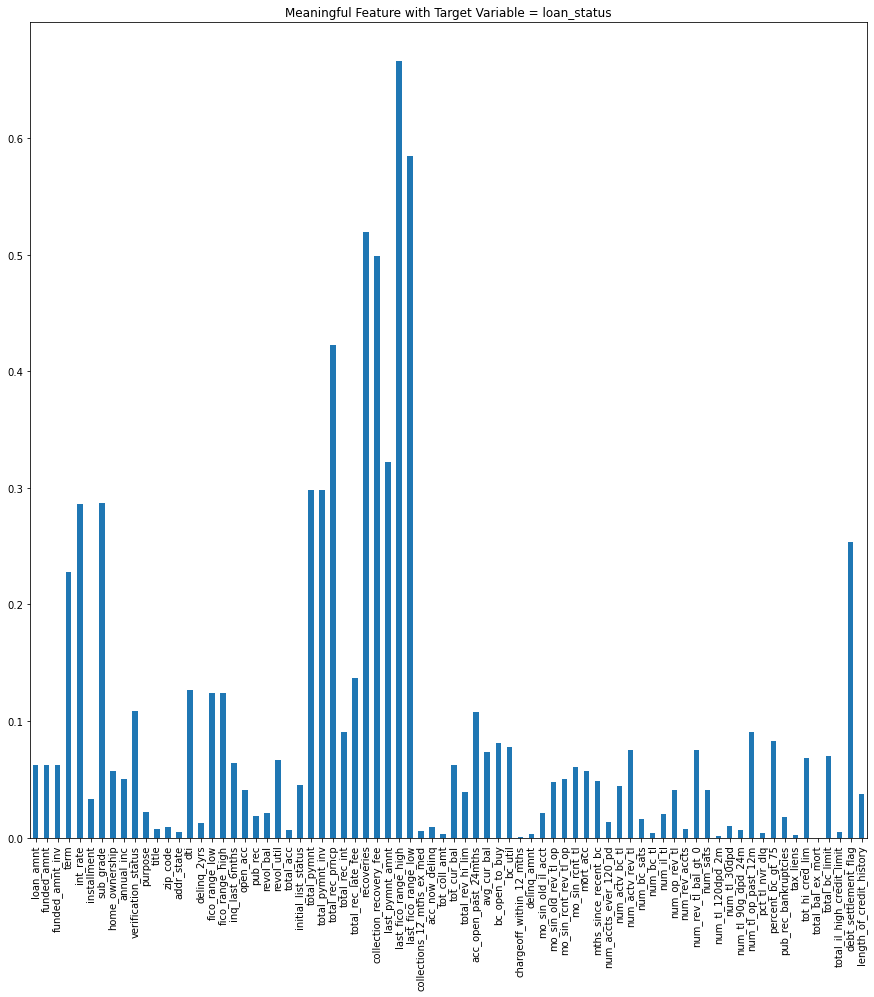

In [37]:
plot = dataset.drop("loan_status", axis=1 ).corrwith(dataset.loan_status).abs().plot.bar(figsize = (15, 15), title = "Meaningful Feature with Target Variable = loan_status")


<AxesSubplot:>

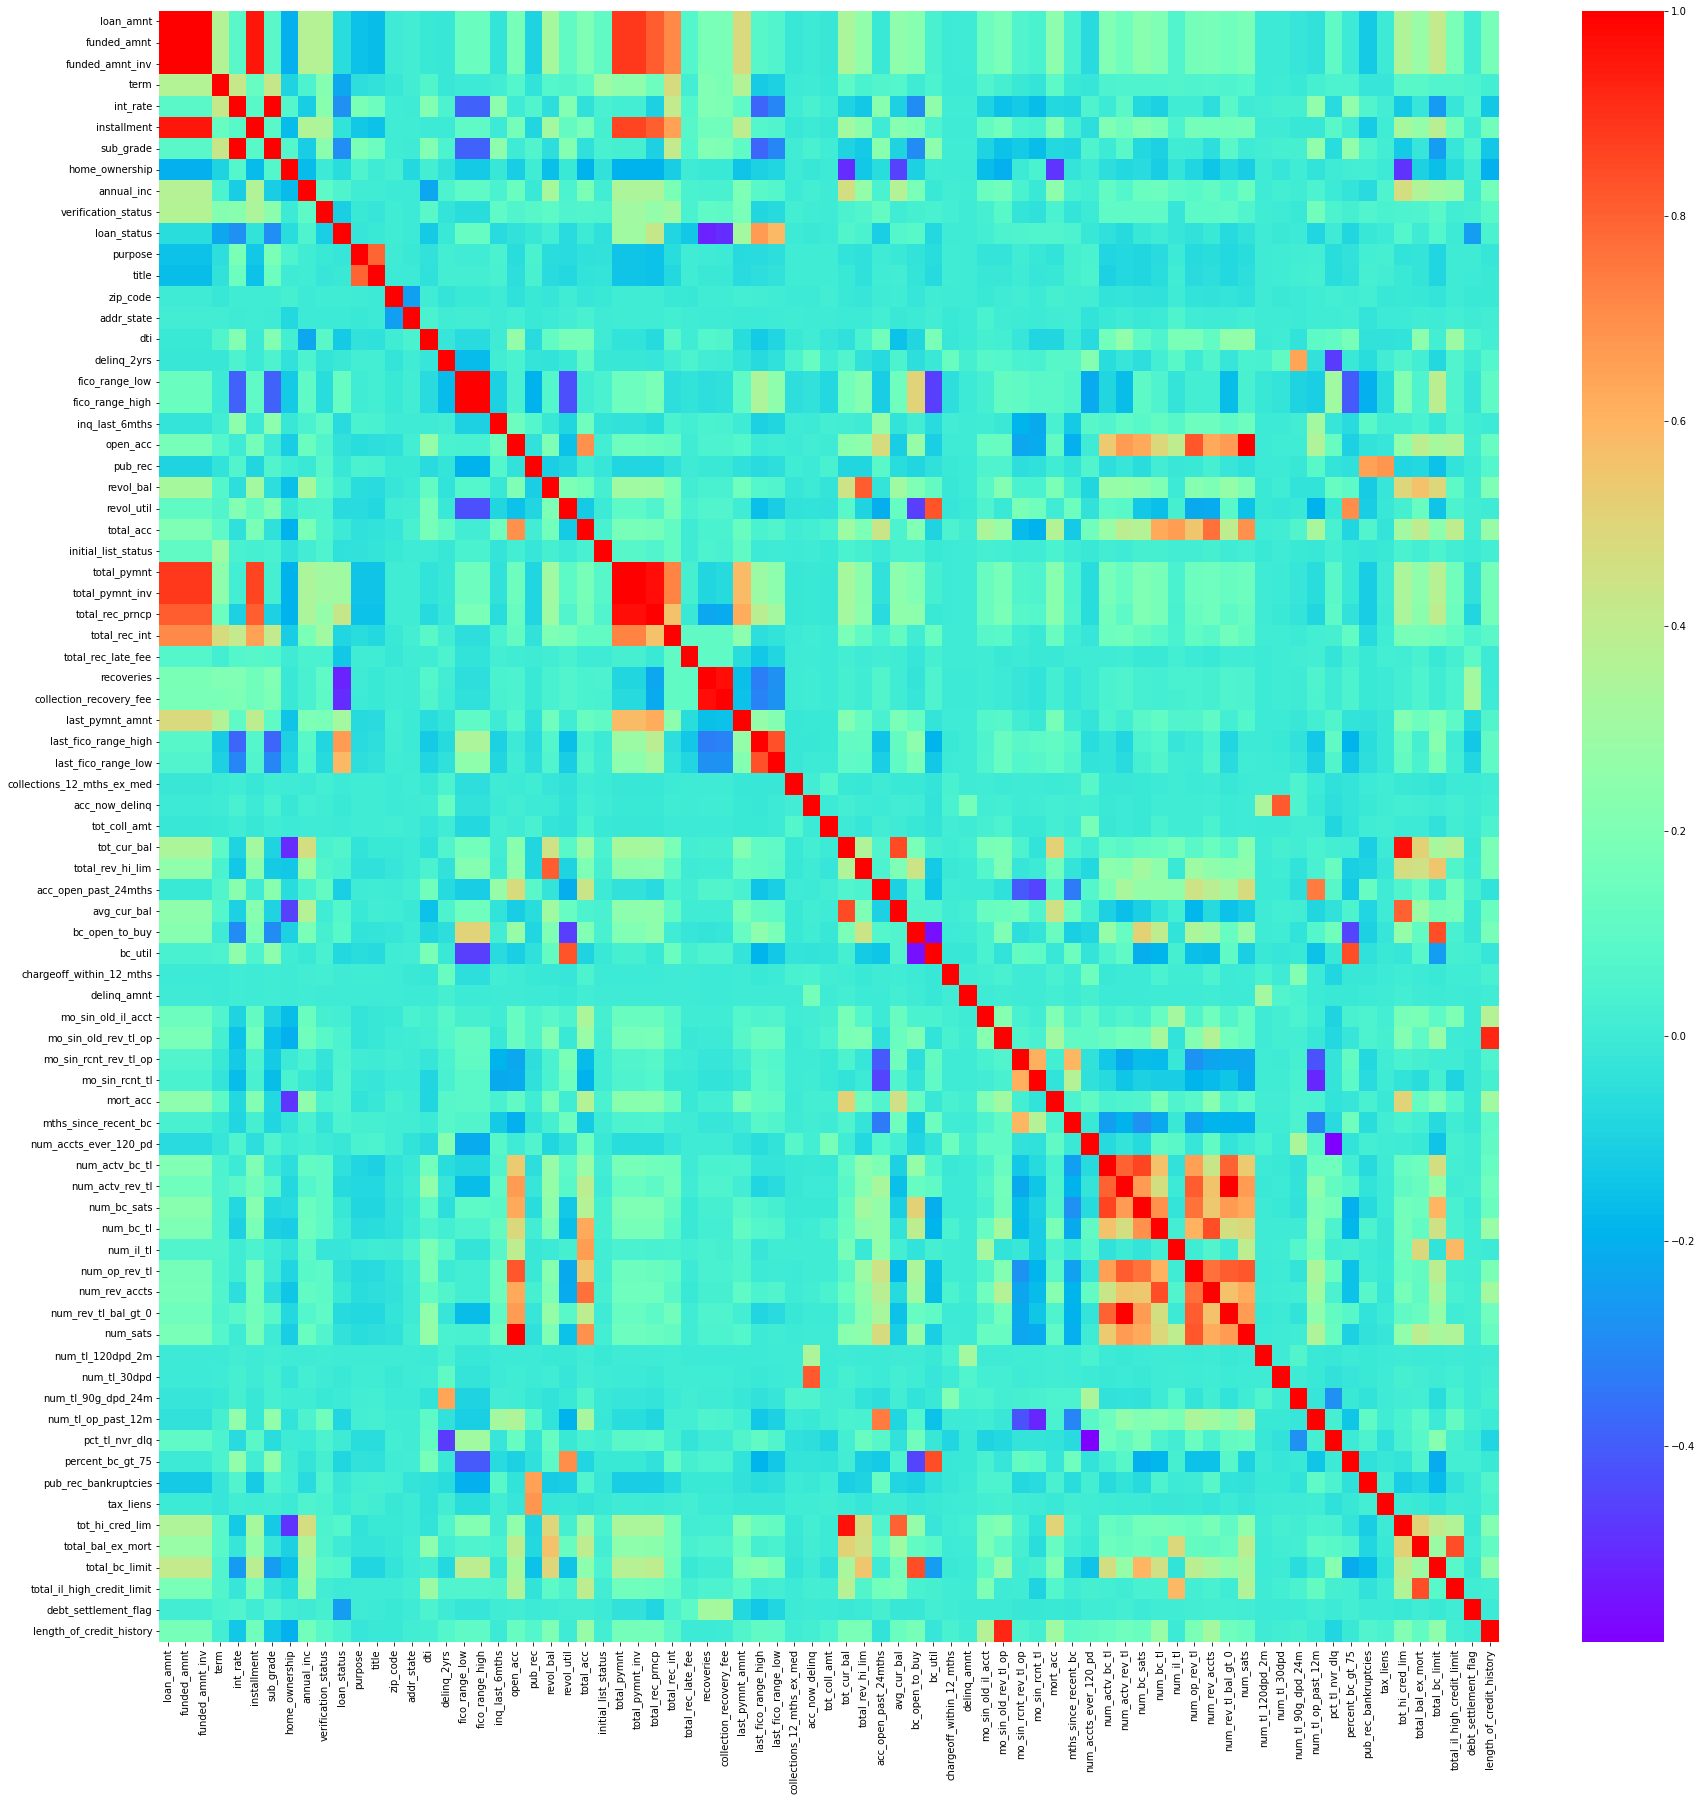

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.iloc[:,:].corr(),cmap = "rainbow")


In [39]:
#choosing features with correlation <-0.4 or >0.4 to dependent variable 'loan_status'
for i in dataset.columns[dataset.corr()['loan_status'].abs() < 0.4]:
    dataset.drop([i],axis = 'columns',inplace = True)


In [40]:
#check the dataset correlation
dataset.corr(method='pearson')

,loan_status,total_rec_prncp,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low
loan_status,1.000000,0.422785,-0.519091,-0.498922,0.665901,0.584950
total_rec_prncp,0.422785,1.000000,-0.228666,-0.214887,0.382628,0.321546
recoveries,-0.519091,-0.228666,1.000000,0.969476,-0.326899,-0.284883
collection_recovery_fee,-0.498922,-0.214887,0.969476,1.000000,-0.314751,-0.275454
last_fico_range_high,0.665901,0.382628,-0.326899,-0.314751,1.000000,0.835585
last_fico_range_low,0.584950,0.321546,-0.284883,-0.275454,0.835585,1.000000


In [41]:
pca = PCA(n_components=1)
dataset = dataset.reset_index()
principalComponents = pca.fit_transform(dataset[['recoveries', 'collection_recovery_fee']])
dataset['pca_recovery'] = pd.DataFrame(data = principalComponents, columns = ['pca_recovery'])
principalComponents = pca.fit_transform(dataset[['last_fico_range_high', 'last_fico_range_low']])
dataset['pca_last_fico'] = pd.DataFrame(data = principalComponents, columns = ['pca_last_fico'])
dataset.drop(dataset[['index','recoveries', 'collection_recovery_fee','last_fico_range_high', 'last_fico_range_low']],
             axis = 'columns',
             inplace = True)

In [42]:
dataset.corr(method='pearson')

,loan_status,total_rec_prncp,pca_recovery,pca_last_fico
loan_status,1.000000,0.422785,-0.518956,-0.628123
total_rec_prncp,0.422785,1.000000,-0.228468,-0.349992
pca_recovery,-0.518956,-0.228468,1.000000,0.306605
pca_last_fico,-0.628123,-0.349992,0.306605,1.000000


## Model

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

## Model Training

In [44]:
X_train, X_test, y_train, y_test = \
train_test_split( 
    dataset.drop('loan_status', axis = 1), 
    dataset['loan_status'], 
    test_size = 0.2, 
    random_state = 0)

### KNN

In [45]:
y_train_accuracy=[]
y_test_accuracy=[]
def knn_train(x_train, y_train, x_test, y_test, K):
    knn = KNeighborsClassifier(
    n_neighbors = K,
    metric = 'minkowski')
    model = knn.fit(x_train, y_train)
    print("---------------------------------------------------------------------")
    print("K:", K)
    y_pred = model.predict(x_train)
    print('Training_Data_Accuracy: ', accuracy_score(y_train, y_pred))
    y_train_accuracy.append(accuracy_score(y_train, y_pred))
    y_pred = model.predict(x_test)
    print("Testing_Data_Accuracy: ",accuracy_score(y_test, y_pred))
    y_test_accuracy.append(accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in k_list:
    knn_accuracy_results = knn_train(X_train, y_train, X_test, y_test, i)

---------------------------------------------------------------------
K: 1
Training_Data_Accuracy:  0.9999844840961986
Testing_Data_Accuracy:  0.9659281325637684
Confusion Matrix:
[[ 2639   321]
 [  228 12925]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2960
           1       0.98      0.98      0.98     13153

    accuracy                           0.97     16113
   macro avg       0.95      0.94      0.94     16113
weighted avg       0.97      0.97      0.97     16113

---------------------------------------------------------------------
K: 2
Training_Data_Accuracy:  0.9864080682699767
Testing_Data_Accuracy:  0.962080307825979
Confusion Matrix:
[[ 2737   223]
 [  388 12765]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2960
           1       0.98      0.97      0.98     13153

    accuracy                           0.9

[0.9999844840961986, 0.9864080682699767, 0.9809154383242824, 0.9783863460046548, 0.9756089992242049, 0.974755624515128, 0.9730643910007758, 0.9725833979829325, 0.9715128006206362, 0.9711404189294026, 0.9700232738557021, 0.9702094647013189, 0.9691543832428239, 0.9689992242048099, 0.9686423584173778, 0.9686578743211792, 0.9683785880527541, 0.9684406516679597, 0.9677424359968968, 0.9676958882854926]
[0.9659281325637684, 0.962080307825979, 0.9659901942530875, 0.9656178241171725, 0.9664246260783218, 0.9662384410103643, 0.9659281325637684, 0.9661763793210452, 0.9656178241171725, 0.9661763793210452, 0.9653695773598957, 0.96580400918513, 0.9649972072239806, 0.9653695773598957, 0.964438652020108, 0.9651833922919382, 0.9643765903307888, 0.9642524669521504, 0.963445664991001, 0.9635077266803203]


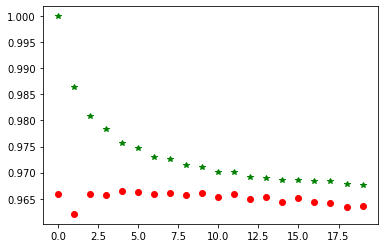

In [46]:
print(y_train_accuracy)
print(y_test_accuracy)
plt.plot(y_train_accuracy,'g*', y_test_accuracy, 'ro')

In [47]:
#Accuracy of testing dataset and training dataset is quite close when K>8, therefore we choose k=10
knn_accuracy_results = knn_train(X_train, y_train, X_test, y_test, 10)

---------------------------------------------------------------------
K: 10
Training_Data_Accuracy:  0.9711404189294026
Testing_Data_Accuracy:  0.9661763793210452
Confusion Matrix:
[[ 2631   329]
 [  216 12937]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2960
           1       0.98      0.98      0.98     13153

    accuracy                           0.97     16113
   macro avg       0.95      0.94      0.94     16113
weighted avg       0.97      0.97      0.97     16113



### Naive Bayes

In [48]:
def gnb_train(x_train, y_train, x_test, y_test):
    gnb = GaussianNB()
    model = gnb.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    print("Training_Data_Accuracy: ", accuracy_score(y_train,y_pred))
    y_pred = model.predict(x_test)
    print("Testing_Data_Accuracy: ", accuracy_score(y_test,y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
gnb_accuracy_result = gnb_train(X_train, y_train, X_test, y_test)

Training_Data_Accuracy:  0.9353297129557797
Testing_Data_Accuracy:  0.9371935704089865
Confusion Matrix:
[[ 1988   972]
 [   40 13113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.80      2960
           1       0.93      1.00      0.96     13153

    accuracy                           0.94     16113
   macro avg       0.96      0.83      0.88     16113
weighted avg       0.94      0.94      0.93     16113



### Decision Tree

In [49]:
y_train_accuracy=[]
y_test_accuracy=[]
def dt_train(x_train, y_train, x_test, y_test, D):
    dt = DecisionTreeClassifier(max_depth = D)
    model = dt.fit(x_train, y_train)
    print("---------------------------------------------------------------------")
    print("Depth:", D)
    y_pred = model.predict(x_train)
    print('Training_Data_Accuracy: ', accuracy_score(y_train, y_pred))
    y_train_accuracy.append(accuracy_score(y_train, y_pred))
    y_pred = model.predict(x_test)
    print("Accuracy:", accuracy_score(y_test,y_pred))
    y_test_accuracy.append(accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

d_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for j in d_list:
    dt_accuracy_results = dt_train(X_train, y_train, X_test, y_test, j)

---------------------------------------------------------------------
Depth: 1
Training_Data_Accuracy:  0.9316524437548487
Accuracy: 0.9332216222925588
Confusion Matrix:
[[ 1884  1076]
 [    0 13153]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      2960
           1       0.92      1.00      0.96     13153

    accuracy                           0.93     16113
   macro avg       0.96      0.82      0.87     16113
weighted avg       0.94      0.93      0.93     16113

---------------------------------------------------------------------
Depth: 2
Training_Data_Accuracy:  0.9316524437548487
Accuracy: 0.9332216222925588
Confusion Matrix:
[[ 1884  1076]
 [    0 13153]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      2960
           1       0.92      1.00      0.96     13153

    accuracy                           0.93     16113
   macr

[0.9316524437548487, 0.9316524437548487, 0.9493716058960434, 0.9524903025601241, 0.9538401861908457, 0.958510473235066, 0.9601706749418154, 0.962389449185415, 0.9654460822342902, 0.9683010085337471, 0.9714041892940264, 0.9760589604344453, 0.9792862684251358, 0.982389449185415, 0.9858494957331264, 0.988688906128782, 0.9911093871217999, 0.9930488750969744, 0.9946935608999224, 0.9961986035686579]
[0.9332216222925588, 0.9332216222925588, 0.9503506485446533, 0.953950226525166, 0.9548811518649538, 0.9596599019425309, 0.9617079376900639, 0.9623285545832557, 0.9652454539812574, 0.9666108111462794, 0.96884503196177, 0.9702724508161112, 0.9701483274374728, 0.9711413144665798, 0.9694656488549618, 0.9709551293986223, 0.9705827592627071, 0.9714516229131757, 0.9712033761558989, 0.9708930677093031]


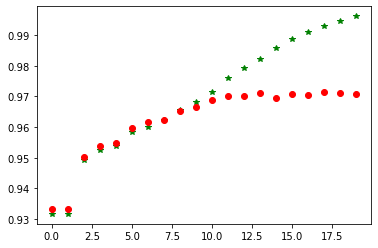

In [50]:
print(y_train_accuracy)
print(y_test_accuracy)
plt.plot(y_train_accuracy,'g*', y_test_accuracy, 'ro')

[Text(3487.5, 1698.75, 'total_rec_prncp <= -219.685\ngini = 0.305\nsamples = 64450\nvalue = [12118, 52332]\nclass = N'),
 Text(3100.0, 1321.25, 'pca_recovery <= 80.402\ngini = 0.143\nsamples = 56737\nvalue = [4405, 52332]\nclass = N'),
 Text(1550.0, 943.75, 'loan_status <= 1999.25\ngini = 0.043\nsamples = 49449\nvalue = [1084, 48365]\nclass = N'),
 Text(775.0, 566.25, 'pca_recovery <= 11.915\ngini = 0.485\nsamples = 977\nvalue = [405, 572]\nclass = N'),
 Text(387.5, 188.75, 'gini = 0.27\nsamples = 542\nvalue = [87, 455]\nclass = N'),
 Text(1162.5, 188.75, 'gini = 0.393\nsamples = 435\nvalue = [318, 117]\nclass = Y'),
 Text(2325.0, 566.25, 'pca_recovery <= 32.461\ngini = 0.028\nsamples = 48472\nvalue = [679, 47793]\nclass = N'),
 Text(1937.5, 188.75, 'gini = 0.012\nsamples = 44660\nvalue = [262, 44398]\nclass = N'),
 Text(2712.5, 188.75, 'gini = 0.195\nsamples = 3812\nvalue = [417, 3395]\nclass = N'),
 Text(4650.0, 943.75, 'loan_status <= 4999.63\ngini = 0.496\nsamples = 7288\nvalue = [

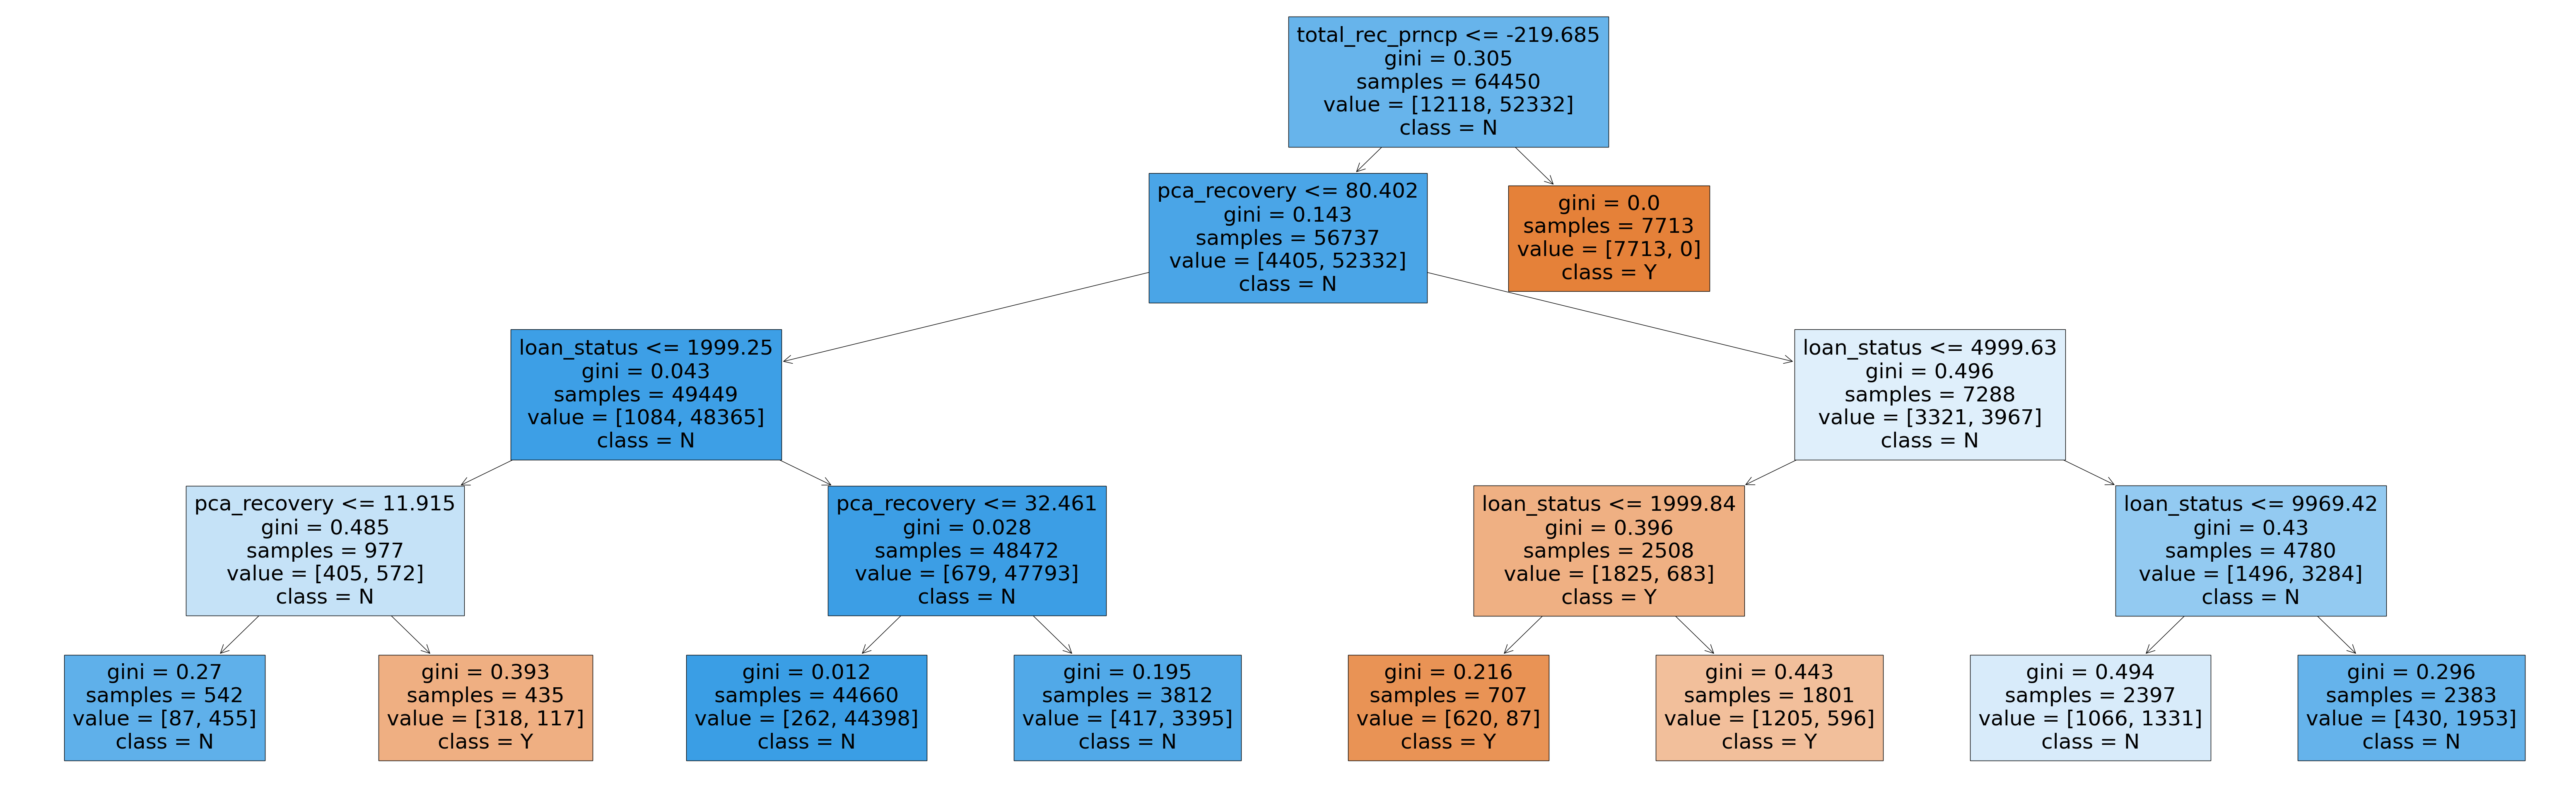

In [51]:
#Accuracy of testing dataset and training dataset is quit closest starting at depth=3 to depth=8,to avoid over fitting we choose depth=4 
dt = DecisionTreeClassifier(max_depth=4)
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test)
fig, axes = plt.subplots(figsize=(80,25),nrows = 1, ncols = 1, dpi = 100)
plot_tree(model,
          feature_names = dataset.columns, 
          class_names = ["Y","N"],
          filled=True)

### SVM

In [52]:
y_train_accuracy=[]
y_test_accuracy=[]
def svm_train(X_train, y_train, X_test, y_test, C):
    svm = SVC(C=C, kernel = 'linear', random_state = 0,cache_size=512)
    model = svm.fit(X_train, y_train)
    print("---------------------------------------------------------------------")
    print("C:", C)
    y_pred = model.predict(X_train)
    print('Training_Data_Accuracy: ', accuracy_score(y_train, y_pred))
    y_train_accuracy.append(accuracy_score(y_train, y_pred))
    y_pred = model.predict(X_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))
    y_test_accuracy.append(accuracy_score(y_test, y_pred))
    print("Confusion Matrix:") 
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

c_list = [0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]
for i in c_list:
    svm_accuracy_results = svm_train(X_train, y_train, X_test, y_test, i)

---------------------------------------------------------------------
C: 0.2
Training_Data_Accuracy:  0.9530799069045772
Accuracy: 0.9552535220008689
Confusion Matrix:
[[ 2446   514]
 [  207 12946]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2960
           1       0.96      0.98      0.97     13153

    accuracy                           0.96     16113
   macro avg       0.94      0.91      0.92     16113
weighted avg       0.95      0.96      0.95     16113

---------------------------------------------------------------------
C: 0.4
Training_Data_Accuracy:  0.952878200155159
Accuracy: 0.9548190901756346
Confusion Matrix:
[[ 2431   529]
 [  199 12954]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2960
           1       0.96      0.98      0.97     13153

    accuracy                           0.95     16113
   macro avg

KeyboardInterrupt: 

In [ ]:
print(y_train_accuracy)
print(y_test_accuracy)
plt.plot(y_train_accuracy,'g*', y_test_accuracy, 'ro')

In [ ]:
#As there no dominate value for C, we just choose C=1.0
svm_accuracy_results = svm_train(X_train, y_train, X_test, y_test, 1)

## Model Evaluation & Prediction

In [ ]:
def model_evaluation(model):
    y_pred = cross_val_predict(
    model, 
    dataset.drop('loan_status',axis=1), 
    dataset['loan_status'], 
    cv=5)
    print('Model:', model)
    print('Accuracy:', accuracy_score(dataset['loan_status'], y_pred))
    print('Recall:', recall_score(dataset['loan_status'], y_pred))    
    print('Precision:', precision_score(dataset['loan_status'], y_pred))
    print('F1:', f1_score(dataset['loan_status'], y_pred))
    print('ROC:', roc_auc_score(dataset['loan_status'], y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(dataset['loan_status'], y_pred))

In [ ]:
knn = KNeighborsClassifier(
    n_neighbors = 10,
    metric = 'minkowski')
model_evaluation(knn)

In [ ]:
gnb = GaussianNB()
model_evaluation(gnb)

In [ ]:
dt = DecisionTreeClassifier(max_depth=4)
model_evaluation(dt)

In [ ]:
y_pred = cross_val_predict(
    SVC(C=1.0, kernel = 'linear', random_state = 0), 
    dataset.drop('loan_status',axis=1), 
    dataset['loan_status'], 
    cv=5)
print('Model:', SVC)
print('Accuracy:', accuracy_score(dataset['loan_status'], y_pred))
print('Recall:', recall_score(dataset['loan_status'], y_pred))    
print('Precision:', precision_score(dataset['loan_status'], y_pred))
print('F1:', f1_score(dataset['loan_status'], y_pred))
print('ROC:', roc_auc_score(dataset['loan_status'], y_pred))
print('Confusion Matrix:')
print(confusion_matrix(dataset['loan_status'], y_pred))